In [1]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
%matplotlib inline

In [2]:
def pretty_print_response(response):
    '''
       This funtions takes in a response in json format and 
       prints out a more readable version
    '''
    print(json.dumps(response, indent=4, sort_keys=True))

In [3]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SBX_SECRET_KEY = os.getenv('PLAID_SBX_SECRET_KEY')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to plaid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [4]:
INSTITUTION_ID = "ins_109508"

### 2. Generate a public token

In [5]:
# YOUR CODE HERE
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SBX_SECRET_KEY, public_key=PLAID_PUBLIC_KEY, environment='sandbox')
create_public_token = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions', 'income', 'assets'])

### 3. Exchange the public token for an access token

In [6]:
# YOUR CODE HERE
exchange_reponse = client.Item.public_token.exchange(create_public_token['public_token'])
exchange_reponse

{'access_token': 'access-sandbox-759db136-6585-42e4-b14e-c02c44f1234f',
 'item_id': 'ZPEGoQWEnoIjqBPnWg1GirzXzN38xLfglVenX',
 'request_id': 'xAxpm6j27zZ1Fdm'}

In [7]:
access_token = exchange_reponse['access_token']
access_token

'access-sandbox-759db136-6585-42e4-b14e-c02c44f1234f'

### 4. Fetch Accounts

In [8]:
# YOUR CODE HERE
client.Accounts.get(access_token)

{'accounts': [{'account_id': 'BpLgVGbLBVT37gw4JRK8uDEw9p9XzJtwMo98Q',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': '33nD8jAnE8CvQVj8P9mbIzVd686lW4tqly7ne',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'xaDZN4nD8NC1EDymlgjWCJ6Qy1y7l3Cn4a5Vv',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [9]:
# YOUR CODE HERE
end_date = datetime.datetime.now()
start_date = end_date + datetime.timedelta(-90)
start_date = start_date.strftime('%Y-%m-%d')
end_date = end_date.strftime('%Y-%m-%d')
print(start_date, end_date)

2020-04-30 2020-07-29


### 2. Print the categories for each transaction

In [10]:
# YOUR CODE HERE
transaction_response = client.Transactions.get(access_token, start_date, end_date)
transaction_response.keys()

dict_keys(['accounts', 'item', 'request_id', 'total_transactions', 'transactions'])

In [11]:
transaction_response['transactions'][0].keys()

dict_keys(['account_id', 'account_owner', 'amount', 'authorized_date', 'category', 'category_id', 'date', 'iso_currency_code', 'location', 'merchant_name', 'name', 'payment_channel', 'payment_meta', 'pending', 'pending_transaction_id', 'transaction_code', 'transaction_id', 'transaction_type', 'unofficial_currency_code'])

In [12]:
pretty_print_response(transaction_response['transactions'][0])

{
    "account_id": "doMAyW6Mzyt3RBevdM8PuDoaq3qlKMtZE18QQ",
    "account_owner": null,
    "amount": 500,
    "authorized_date": null,
    "category": [
        "Travel",
        "Airlines and Aviation Services"
    ],
    "category_id": "22001000",
    "date": "2020-07-29",
    "iso_currency_code": "USD",
    "location": {
        "address": null,
        "city": null,
        "country": null,
        "lat": null,
        "lon": null,
        "postal_code": null,
        "region": null,
        "store_number": null
    },
    "merchant_name": "United Airlines",
    "name": "United Airlines",
    "payment_channel": "in store",
    "payment_meta": {
        "by_order_of": null,
        "payee": null,
        "payer": null,
        "payment_method": null,
        "payment_processor": null,
        "ppd_id": null,
        "reason": null,
        "reference_number": null
    },
    "pending": false,
    "pending_transaction_id": null,
    "transaction_code": null,
    "transaction_id": "p

In [13]:
for transaction in transaction_response['transactions']:
    print(transaction['category'])

['Travel', 'Airlines and Aviation Services']
['Travel', 'Taxi']
['Food and Drink', 'Restaurants']
['Payment']
['Food and Drink', 'Restaurants', 'Fast Food']
['Shops', 'Sporting Goods']
['Payment', 'Credit Card']
['Travel', 'Taxi']
['Transfer', 'Debit']
['Transfer', 'Deposit']
['Recreation', 'Gyms and Fitness Centers']
['Travel', 'Airlines and Aviation Services']
['Food and Drink', 'Restaurants', 'Fast Food']
['Food and Drink', 'Restaurants', 'Coffee Shop']
['Food and Drink', 'Restaurants']
['Transfer', 'Credit']
['Travel', 'Airlines and Aviation Services']


### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [14]:
# YOUR CODE HERE
transactions_df = pd.DataFrame(columns=['Date', 'Name', 'Amount', 'Category'])
transactions = transaction_response['transactions']

for index, transaction in enumerate(transactions): 
    transactions_df.loc[index] = [transaction['date'], transaction['name'], transaction['amount'], transaction['category'][0]]

transactions_df.head()

,Date,Name,Amount,Category
0,2020-07-29,United Airlines,500,Travel
1,2020-07-27,Uber 072515 SF**POOL**,6.33,Travel
2,2020-07-24,Tectra Inc,500,Food and Drink
3,2020-07-23,AUTOMATIC PAYMENT - THANK,2078.5,Payment
4,2020-07-23,KFC,500,Food and Drink


In [15]:
transactions_df.isnull().sum()

Date        0
Name        0
Amount      0
Category    0
dtype: int64

### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [16]:
# YOUR CODE HERE
transactions_df.dtypes

Date        object
Name        object
Amount      object
Category    object
dtype: object

In [17]:
transactions_df['Date'] = pd.to_datetime(transactions_df['Date'])
transactions_df.set_index('Date', inplace = True)
transactions_df.sort_index(inplace  = True)
transactions_df.head()

,Name,Amount,Category
Date,,,
2020-06-29,United Airlines,500,Travel
2020-07-09,INTRST PYMNT,-4.22,Transfer
2020-07-10,SparkFun,89.4,Food and Drink
2020-07-11,Starbucks,4.33,Food and Drink
2020-07-11,McDonald's,12,Food and Drink


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [18]:
income_response = client.Income.get(access_token)
pretty_print_response(income_response)

{
    "income": {
        "income_streams": [
            {
                "confidence": 0.99,
                "days": 690,
                "monthly_income": 500,
                "name": "UNITED AIRLINES"
            }
        ],
        "last_year_income": 6000,
        "last_year_income_before_tax": 7285,
        "max_number_of_overlapping_income_streams": 1,
        "number_of_income_streams": 1,
        "projected_yearly_income": 6085,
        "projected_yearly_income_before_tax": 7389
    },
    "request_id": "Ziz53phvhucRsZP"
}


In [19]:
print(f"Last year's gross income: ${income_response['income']['last_year_income_before_tax']}")

Last year's gross income: $7285


In [20]:
print(f"Current monthly income: ${income_response['income']['income_streams'][0]['monthly_income']}")

Current monthly income: $500


In [21]:
print(f"Projected yearly gross income: ${income_response['income']['projected_yearly_income_before_tax']}")

Projected yearly gross income: $7389


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calculate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

In [22]:
# YOUR CODE HERE
transactions_df.head()

,Name,Amount,Category
Date,,,
2020-06-29,United Airlines,500,Travel
2020-07-09,INTRST PYMNT,-4.22,Transfer
2020-07-10,SparkFun,89.4,Food and Drink
2020-07-11,Starbucks,4.33,Food and Drink
2020-07-11,McDonald's,12,Food and Drink


In [23]:
#transactions_df.groupby(by = 'Category').sum()['Amount']
transactions_df.groupby(by='Category').sum()

,Name,Amount
Category,,
Food and Drink,SparkFunStarbucksMcDonald'sKFCTectra Inc,1105.73
Payment,CREDIT CARD 3333 PAYMENT *//AUTOMATIC PAYMENT ...,2103.50
Recreation,Touchstone Climbing,78.50
Shops,Madison Bicycle Shop,500.00
Transfer,INTRST PYMNTCD DEPOSIT .INITIAL.ACH Electronic...,6845.78
Travel,United AirlinesUnited AirlinesUber 063015 SF**...,511.73


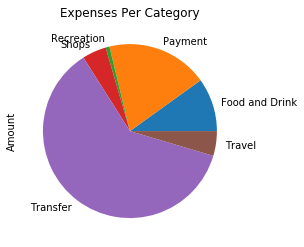

In [24]:
#transactions_df.groupby(by = 'Category').sum().plot.pie(y='Amount', legend=False)
transactions_df.groupby('Category').sum()['Amount'].plot.pie(title='Expenses Per Category')

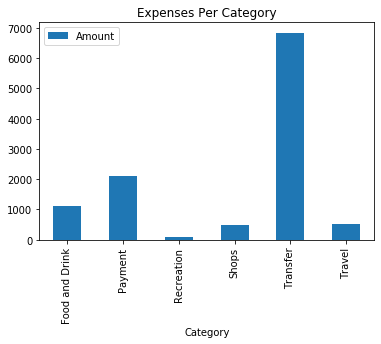

In [25]:
transactions_df.groupby(by = 'Category').sum().plot.bar(title='Expenses Per Category')

### Calculate the expenses per month

In [26]:
# YOUR CODE HERE
transactions_df['Month'] = pd.DatetimeIndex(data=transactions_df.index).month
transactions_df.head(5)

,Name,Amount,Category,Month
Date,,,,
2020-06-29,United Airlines,500,Travel,6
2020-07-09,INTRST PYMNT,-4.22,Transfer,7
2020-07-10,SparkFun,89.4,Food and Drink,7
2020-07-11,Starbucks,4.33,Food and Drink,7
2020-07-11,McDonald's,12,Food and Drink,7


In [27]:
# Use the reference below to change month number into names
#https://stackoverflow.com/questions/6557553/get-month-name-from-number
import calendar

transactions_df['Month'] = transactions_df.Month.apply(lambda x: calendar.month_name[x])
transactions_df.head()

,Name,Amount,Category,Month
Date,,,,
2020-06-29,United Airlines,500,Travel,June
2020-07-09,INTRST PYMNT,-4.22,Transfer,July
2020-07-10,SparkFun,89.4,Food and Drink,July
2020-07-11,Starbucks,4.33,Food and Drink,July
2020-07-11,McDonald's,12,Food and Drink,July


In [28]:
transactions_df.groupby(by='Month').sum()

,Name,Amount,Category
Month,,,
July,INTRST PYMNTSparkFunStarbucksMcDonald'sUnited ...,10645.24,TransferFood and DrinkFood and DrinkFood and D...
June,United Airlines,500.00,Travel


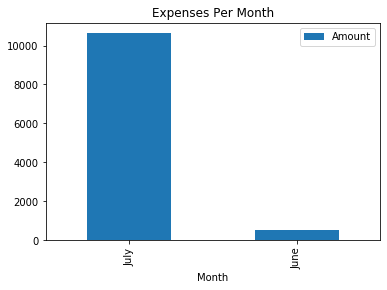

In [29]:
transactions_df.groupby(by='Month').sum().plot.bar(title='Expenses Per Month')

In [30]:
# Saving data for future use
transactions_df.to_csv('budget_analysis_data.csv')